<a href="https://colab.research.google.com/github/abigail-rl/Telecom_x2/blob/main/TelecomX_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🚀 **TELECOM X - PARTE 2**

Esta segunda parte de Challenge consiste en desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

##Importar Librerias a usar

In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Preparacion de los datos
Se importan los datos del Dataset trabajado en TelecomX parte 1. El archivo esta en formato .CSV

In [26]:
datos = pd.read_csv('/content/datos_tratados.csv')
datos.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


###Eliminacion de columnas irrelevantes
Una vez completada la importación del archivo se procede a eliminar las columnas que no son relevantes para el estudio, ya que pueden perjudicar el desempeño del modelo.

In [27]:
#Comprobamos que no hubiesen espacios o diferencias en los nombres de las columnas
print(datos.columns.tolist())

['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges_Monthly', 'account_Charges_Total', 'Cuentas_Diarias']


In [28]:
# Verificamos que no hubiesen por espacios ni mayúsculas para normalizar los nombres y evitar errrores
datos.columns = datos.columns.str.strip()
datos.columns = datos.columns.str.strip().str.lower()
datos.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [29]:
# Se elimina la columna customerid
datos = datos.drop('customerid', axis=1)
datos.head()


,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,no,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,no,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


###Encoding

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning.

In [30]:
# 2. Transformar variables categóricas a formato numérico (One-Hot Encoding)
# Identificar columnas categóricas (object type)
categorical_cols = datos.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
datos_final = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)


# Mostrar las primeras filas del DataFrame transformado
print("DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:")
print(datos_final.head())

# Mostrar las nuevas dimensiones del DataFrame
print(f"\nDimensiones del DataFrame final: {datos_final.shape}")

# Mostrar los tipos de datos de las columnas para confirmar la transformación
print("\nTipos de datos de las columnas en el DataFrame final:")
print(datos_final.info())

DataFrame después de eliminar 'customerID' y aplicar One-Hot Encoding:
   customer_seniorcitizen  customer_tenure  account_charges_monthly  account_charges_total  cuentas_diarias  churn_yes  customer_gender_Male  customer_partner_Yes  customer_dependents_Yes  phone_phoneservice_Yes  phone_multiplelines_No phone service  phone_multiplelines_Yes  internet_internetservice_Fiber optic  internet_internetservice_No  internet_onlinesecurity_No internet service  internet_onlinesecurity_Yes  internet_onlinebackup_No internet service  internet_onlinebackup_Yes  internet_deviceprotection_No internet service  internet_deviceprotection_Yes  internet_techsupport_No internet service  internet_techsupport_Yes  internet_streamingtv_No internet service  internet_streamingtv_Yes  internet_streamingmovies_No internet service  internet_streamingmovies_Yes  account_contract_One year  account_contract_Two year  account_paperlessbilling_Yes  account_paymentmethod_Credit card (automatic)  account_paymentmethod

###Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.**texto en negrita**

In [32]:
print("Distribución de la variable 'Churn':")
print(datos_final['churn_yes'].value_counts()) # Assuming Churn_yes is the one-hot encoded column for 'yes'
print(datos_final['churn_yes'].value_counts(normalize=True))

Distribución de la variable 'Churn':
churn_yes
False    5398
True     1869
Name: count, dtype: int64
churn_yes
False    0.74281
True     0.25719
Name: proportion, dtype: float64


##Correlacion y Seleccion de Variables

###Analisis de Correlacion
Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

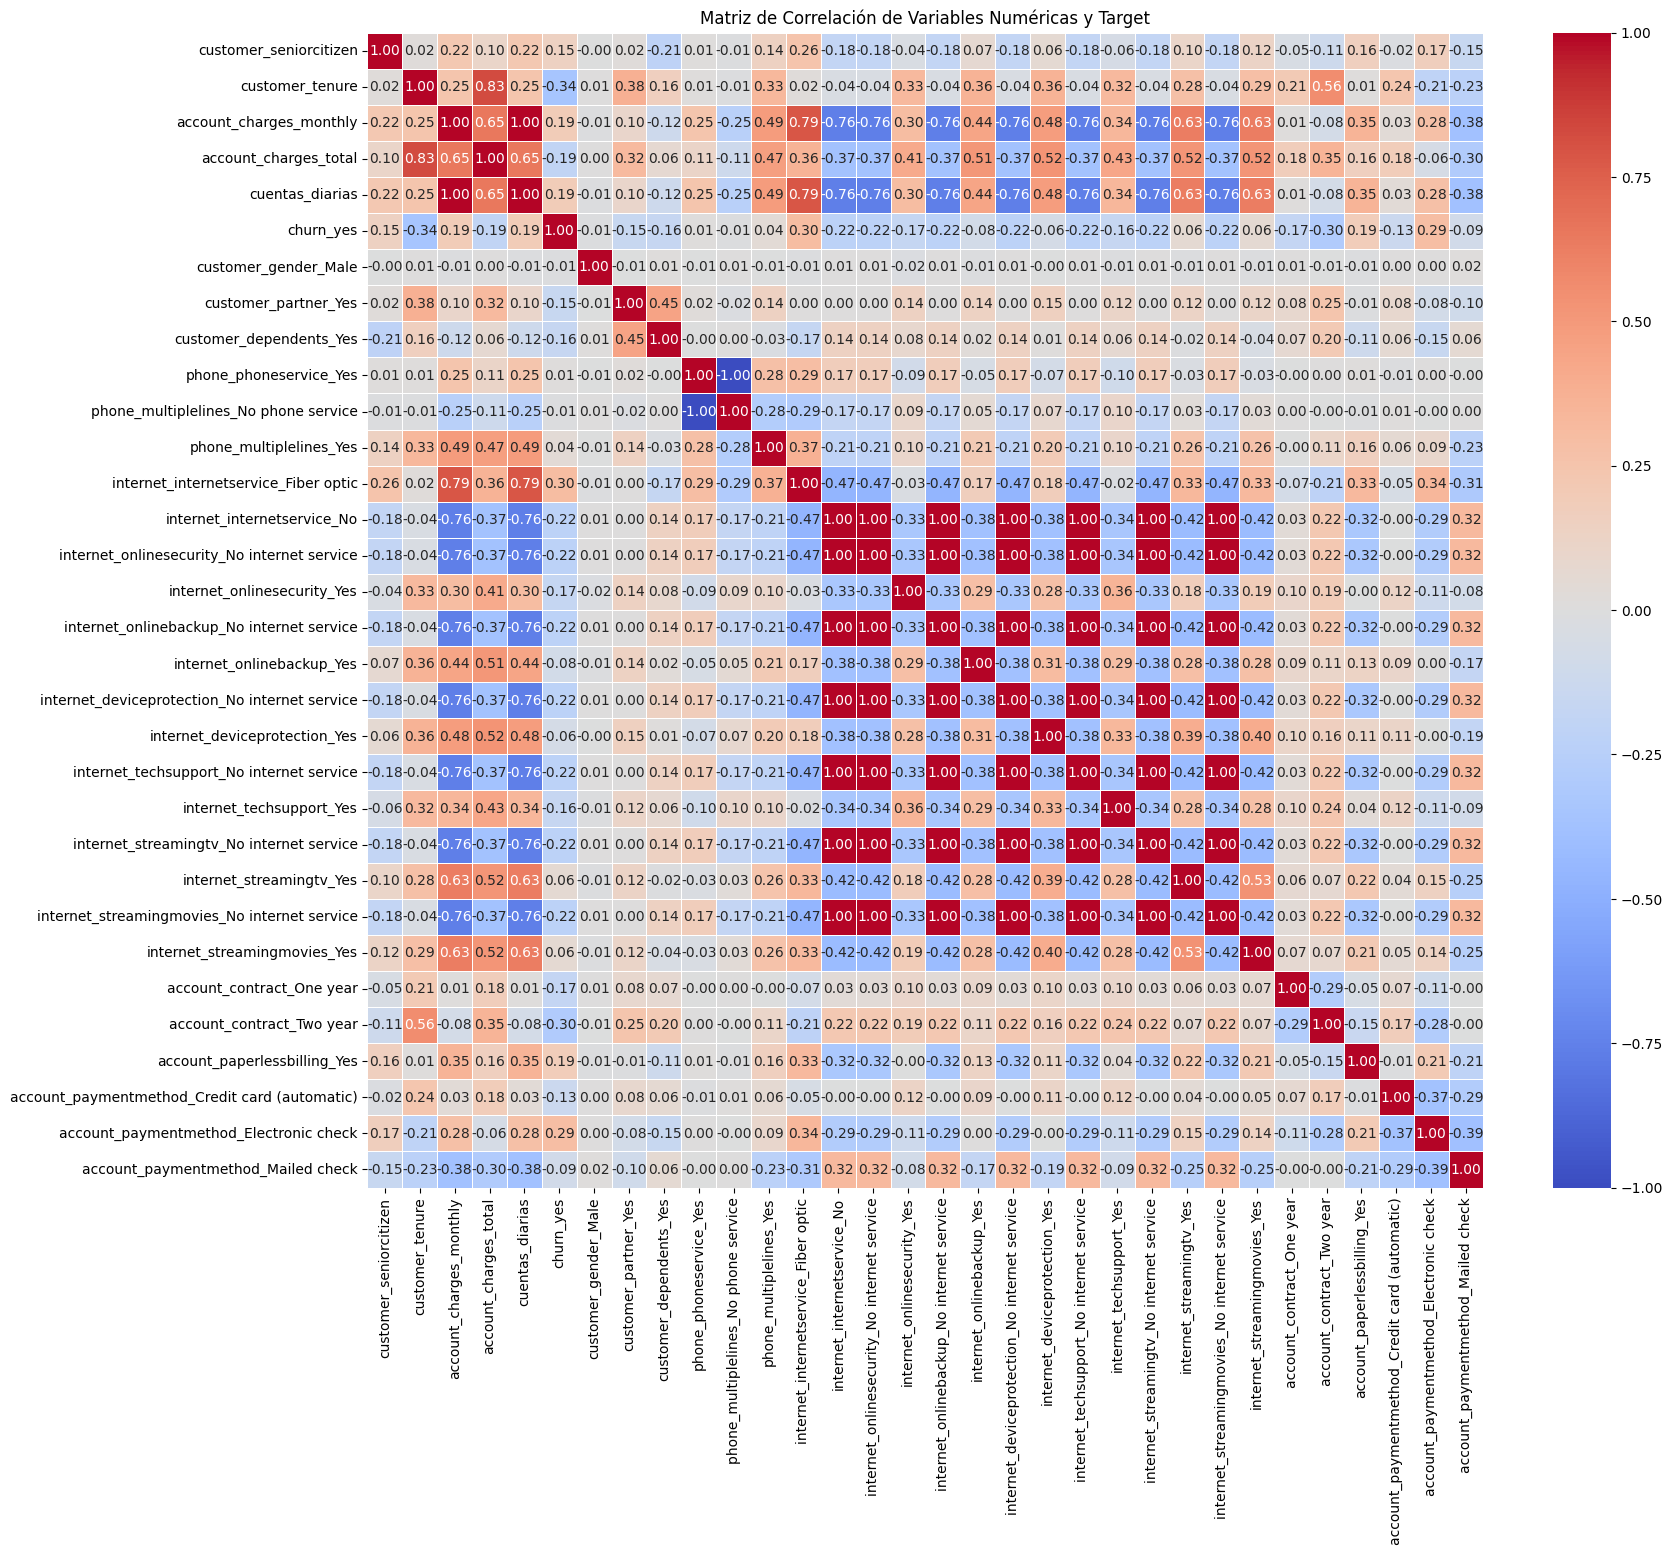


Correlación con la variable 'churn_yes':
churn_yes                                        1.000000
internet_internetservice_Fiber optic             0.300949
account_paymentmethod_Electronic check           0.294626
account_charges_monthly                          0.189866
cuentas_diarias                                  0.189866
account_paperlessbilling_Yes                     0.186666
customer_seniorcitizen                           0.146733
internet_streamingtv_Yes                         0.062430
internet_streamingmovies_Yes                     0.060586
phone_multiplelines_Yes                          0.039343
phone_phoneservice_Yes                           0.012571
customer_gender_Male                            -0.009555
phone_multiplelines_No phone service            -0.012571
internet_deviceprotection_Yes                   -0.063452
internet_onlinebackup_Yes                       -0.080163
account_paymentmethod_Mailed check              -0.090061
account_paymentmethod_Credit c

In [35]:
# Calculate the correlation matrix
correlation_matrix = datos_final.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Target')
plt.show()

# To specifically look at correlations with 'churn_yes':
print("\nCorrelación con la variable 'churn_yes':")
print(correlation_matrix['churn_yes'].sort_values(ascending=False))

###Análisis Dirigido
Investiga cómo variables específicas se relacionan con la cancelación, tales como:

* Tiempo de contrato × Cancelación

* Gasto total × Cancelación


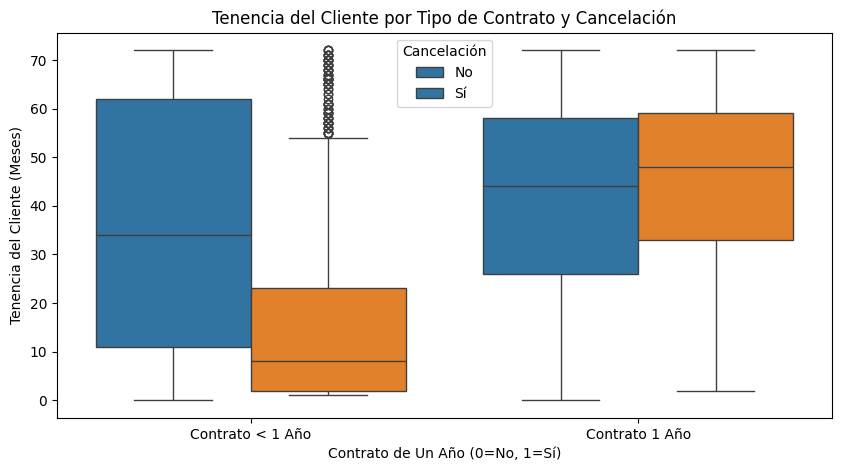

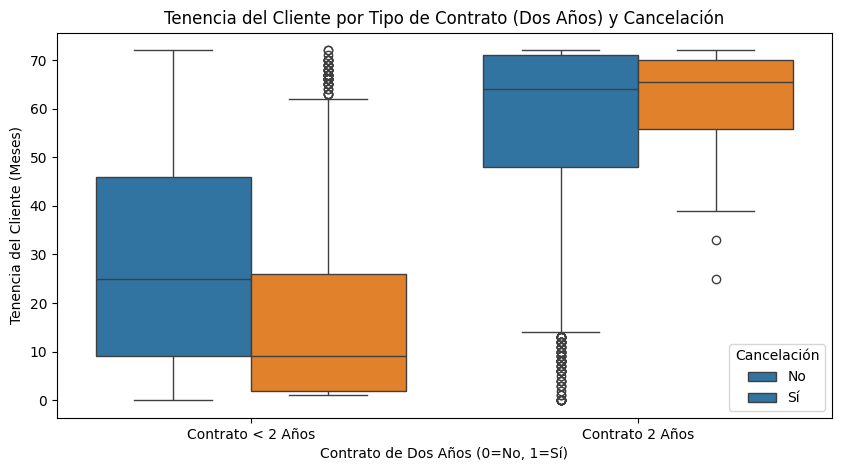


Porcentaje de Cancelación por Tipo de Contrato:
   account_contract_One year  account_contract_Two year  churn_yes
0                      False                      False   0.413233
1                      False                       True   0.027539
2                       True                      False   0.109282


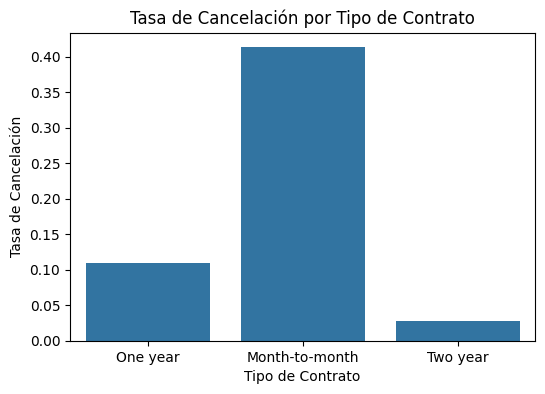

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='account_contract_One year', y='customer_tenure', hue='churn_yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato y Cancelación')
plt.xlabel('Contrato de Un Año (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 1 Año', 'Contrato 1 Año']) # Adjust labels for clarity
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='account_contract_Two year', y='customer_tenure', hue='churn_yes', data=datos_final)
plt.title('Tenencia del Cliente por Tipo de Contrato (Dos Años) y Cancelación')
plt.xlabel('Contrato de Dos Años (0=No, 1=Sí)')
plt.ylabel('Tenencia del Cliente (Meses)')
plt.xticks(ticks=[0, 1], labels=['Contrato < 2 Años', 'Contrato 2 Años']) # Adjust labels for clarity
plt.legend(title='Cancelación', labels=['No', 'Sí'])
plt.show()

# Also, let's look at the churn rate per contract type directly using a bar plot
churn_by_contract = datos_final.groupby(['account_contract_One year', 'account_contract_Two year'])['churn_yes'].mean().reset_index()
print("\nPorcentaje de Cancelación por Tipo de Contrato:")
print(churn_by_contract)

# Simplified visualization of churn rate by contract
# We need to reconstruct the original contract types for better visualization
def get_contract_type(row):
    if row['account_contract_Two year'] == 1:
        return 'Two year'
    elif row['account_contract_One year'] == 1:
        return 'One year'
    else:
        return 'Month-to-month'

datos_final['original_contract_type'] = datos_final.apply(get_contract_type, axis=1)

plt.figure(figsize=(6, 4))
sns.barplot(x='original_contract_type', y='churn_yes', data=datos_final, ci=None)
plt.title('Tasa de Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Cancelación')
plt.show()

##Modelo predictivo

###Separacion de datos
Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo

In [43]:
# Definir características (X) y variable objetivo (y)
# Se asume que 'Churn_yes' es la variable objetivo después de aplicar one-hot encoding
# Asegúrese de que el nombre de la columna objetivo sea correcto después del one-hot encoding (por ejemplo, 'Churn_yes' si 'Churn' tenía valores 'yes' y 'no')
X = datos_final.drop('churn_yes', axis=1) # Características
y = datos_final['churn_yes'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
# random_state asegura la reproducibilidad de la división
# stratify=y asegura que la proporción de 'yes' y 'no' en Churn_yes se mantenga tanto en el conjunto de entrenamiento como en el de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

print("\nDistribución de 'churn_yes' en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de 'churn_yes' en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Dimensiones de X_train: (5813, 32)
Dimensiones de X_test: (1454, 32)
Dimensiones de y_train: (5813,)
Dimensiones de y_test: (1454,)

Distribución de 'churn_yes' en el conjunto de entrenamiento:
churn_yes
False    0.742818
True     0.257182
Name: proportion, dtype: float64

Distribución de 'churn_yes' en el conjunto de prueba:
churn_yes
False    0.742779
True     0.257221
Name: proportion, dtype: float64


###Creación de modelos

Modelo de Regresion logistica (con Normalización) y Random Forest

In [48]:
# Asegúrese de que 'account_charges_total' sea numérico.
# errors='coerce' convertirá cualquier valor no convertible en NaN.
# Note: This step was already done on the original 'datos' DataFrame, but the NaNs are in 'datos_final' after get_dummies.
# We will handle NaNs in X_train and X_test directly.


# Identificar columns to exclude from scaling and model training
cols_to_exclude = ['original_contract_type']

# Define features (X) and target variable (y) - already done in previous cell, but re-defining for clarity in this block
# Assuming 'churn_yes' is the target variable after one-hot encoding
X = datos_final.drop('churn_yes', axis=1) # Features
y = datos_final['churn_yes'] # Target variable

# Split data into training and testing sets (80/20) - already done in previous cell, but re-defining for clarity in this block
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Handle missing values in 'account_charges_total' in both training and test sets
# Use the median of the training set to avoid data leakage
median_charges_total_train = X_train['account_charges_total'].median()
X_train['account_charges_total'].fillna(median_charges_total_train, inplace=True)
X_test['account_charges_total'].fillna(median_charges_total_train, inplace=True) # Fill test set NaNs with training median

print(f"Missing values in X_train after filling: {X_train.isnull().sum().sum()}")
print(f"Missing values in X_test after filling: {X_test.isnull().sum().sum()}")


# Identify numerical columns for normalization, excluding the ones to exclude
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.difference(cols_to_exclude)

# Initialize StandardScaler
scaler = StandardScaler()

# Adjust and transform the training and test data with the scaler
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert the scaled arrays back to DataFrame, keeping column names and index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Recombine the scaled numerical columns with the non-scaled (one-hot encoded) columns
# First, identify non-numerical columns (which should be the one-hot encoded ones), excluding the ones to exclude
non_numerical_cols_train = X_train.select_dtypes(exclude=['int64', 'float64']).columns.difference(cols_to_exclude)
non_numerical_cols_test = X_test.select_dtypes(exclude=['int64', 'float64']).columns.difference(cols_to_exclude)


# Combine the scaled numerical columns with the original non-numerical columns
X_train_final_lr = pd.concat([X_train_scaled_df, X_train[non_numerical_cols_train]], axis=1)
X_test_final_lr = pd.concat([X_test_scaled_df, X_test[non_numerical_cols_test]], axis=1)


# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for datasets small and L1/L2 regularization
log_reg_model.fit(X_train_final_lr, y_train)

# Make predictions on the scaled test set
y_pred_lr = log_reg_model.predict(X_test_final_lr)

# Evaluate the Logistic Regression model
print("--- Modelo de Regresión Logística (con Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))

# --- Modelo 2: Random Forest (without Normalization) ---
from sklearn.ensemble import RandomForestClassifier

# Exclude the 'original_contract_type' column from the training and test data for Random Forest
X_train_rf = X_train.drop(columns=cols_to_exclude)
X_test_rf = X_test.drop(columns=cols_to_exclude)

# Initialize and train the Random Forest model (using original, non-scaled data)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators is the number of trees
rf_model.fit(X_train_rf, y_train)

# Make predictions on the original test set
y_pred_rf = rf_model.predict(X_test_rf)


# Evaluate the Random Forest model
print("\n--- Modelo Random Forest (sin Normalización) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))

Missing values in X_train after filling: 0
Missing values in X_test after filling: 0
--- Modelo de Regresión Logística (con Normalización) ---
Accuracy: 0.8026

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.85      0.89      0.87      1080
        True       0.64      0.54      0.59       374

    accuracy                           0.80      1454
   macro avg       0.74      0.72      0.73      1454
weighted avg       0.79      0.80      0.80      1454


Matriz de Confusión:
 [[964 116]
 [171 203]]

--- Modelo Random Forest (sin Normalización) ---
Accuracy: 0.7758

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.83      0.88      0.85      1080
        True       0.58      0.47      0.52       374

    accuracy                           0.78      1454
   macro avg       0.70      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454


Matriz de Confus

###Evaluacion de los modelos

####**Modelo 1: Regresión Logística (con Normalización)**

Este modelo es sensible a la escala de los datos, por lo que aplicamos normalización.

**Métricas Clave:**

* Exactitud (Accuracy): 80.26%

* Precisión (Clase 'True' - Abandono): 64%

* Recall (Clase 'True' - Abandono): 54%

* F1-score (Clase 'True' - Abandono): 59%

**Matriz de Confusión:**

* Verdaderos Positivos (VP): 203 clientes que realmente abandonaron y fueron predichos correctamente.

* Falsos Positivos (FP): 116 clientes que no abandonaron pero fueron predichos incorrectamente como si lo hicieran.

* Verdaderos Negativos (VN): 964 clientes que no abandonaron y fueron predichos correctamente.

* Falsos Negativos (FN): 171 clientes que realmente abandonaron pero fueron predichos incorrectamente como si no lo hicieran.

####**Modelo 2: Random Forest (sin Normalización)**

Este modelo no requiere normalización de datos.

**Métricas Clave:**

* Exactitud (Accuracy): 77.58%

* Precisión (Clase 'True' - Abandono): 58%

* Recall (Clase 'True' - Abandono): 47%

* F1-score (Clase 'True' - Abandono): 52%

**Matriz de Confusión:**

* Verdaderos Positivos (VP): 174 clientes que realmente abandonaron y fueron predichos correctamente.

* Falsos Positivos (FP): 126 clientes que no abandonaron pero fueron predichos incorrectamente como si lo hicieran.

* Verdaderos Negativos (VN): 954 clientes que no abandonaron y fueron predichos correctamente.

* Falsos Negativos (FN): 200 clientes que realmente abandonaron pero fueron predichos incorrectamente como si no lo hicieran.

####**Modelo con mejor desemepeño:  Regresion Logistica**
* Regresión Logística: 80.26% exactitud, 54% recall
* Random Forest: 77.58% exactitud, 47% recall.

####**Overfitting o Underfitting**
* Ambos modelos muestran posible underfitting en la clase minoritaria ("abandono")
* Esto se refleja en un recall moderado (54% Regresión Logística, 47% Random Forest) → se pierden clientes que realmente abandonan (falsos negativos)
* Regresión Logística: Puede ser demasiado simple para capturar la complejidad del churn
* Random Forest: No está explotando todo su potencial; puede requerir ajuste de hiperparámetros o balanceo de clases


##Interpretacion y conclusiones

###Analisis de la importancia de las Variables


Top 10 variables más importantes del Random Forest:
account_charges_total                     0.172945
customer_tenure                           0.152109
cuentas_diarias                           0.132517
account_charges_monthly                   0.131723
internet_internetservice_Fiber optic      0.036116
account_contract_Two year                 0.032985
account_paymentmethod_Electronic check    0.031671
customer_gender_Male                      0.025624
account_paperlessbilling_Yes              0.023512
customer_partner_Yes                      0.021417
dtype: float64


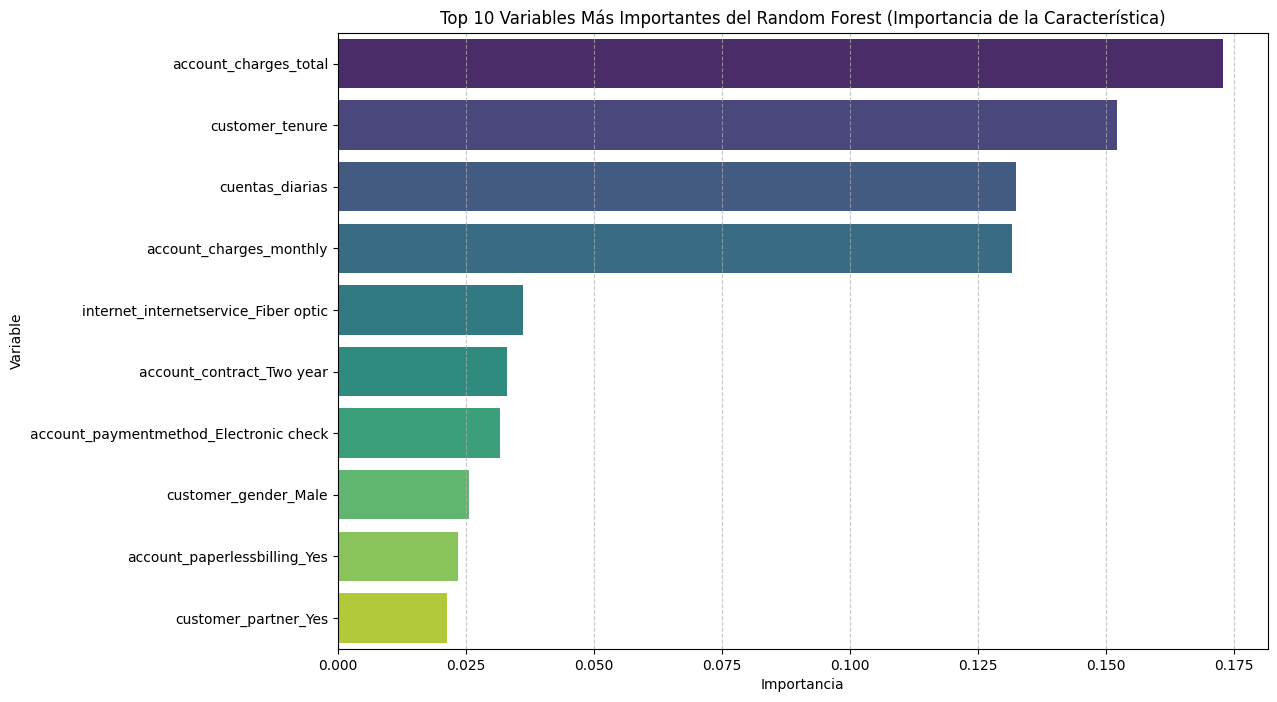

In [50]:
# Obtener la importancia de las características
# Use X_train_rf.columns as the index since rf_model was trained on X_train_rf
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_rf.columns)

# Ordenar y mostrar las Top 10
top_10_features_rf = feature_importances.sort_values(ascending=False).head(10)
print("\nTop 10 variables más importantes del Random Forest:")
print(top_10_features_rf)

# Visualizar la importancia de las características
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_features_rf.values, y=top_10_features_rf.index, palette='viridis')
plt.title('Top 10 Variables Más Importantes del Random Forest (Importancia de la Característica)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

###**Conclusion**

#### **✅ Análisis de Rendimiento**

- *Regresión Logística (con normalización)*  
  - Accuracy: *80.26%*  
  - Recall en clase "True" (clientes que cancelan): *54%*  
  - F1-Score clase "True": *0.59*  
  - Observación: Modelo más equilibrado y con mejor capacidad de identificar clientes en riesgo de abandono.

- *Random Forest (sin normalización)*  
  - Accuracy: *77.58%*  
  - Recall en clase "True": *47%*  
  - F1-Score clase "True": *0.52*  
  - Observación: Aunque tiene buena precisión en la clase "False" (clientes que no cancelan), es menos eficaz para detectar a los que sí abandonan.

- *Conclusión General*  
  La *Regresión Logística* se destaca como el modelo más adecuado para la predicción de churn, ya que logra identificar una mayor proporción de clientes que efectivamente cancelan, lo cual es clave para diseñar estrategias de retención.  
  Ambos modelos presentan margen de mejora en la detección de la clase minoritaria ("True").

---

#### **📊 Factores Clave que Influyen en la Cancelación**

| Factor | Impacto |
|--------|---------|
| account_charges_total | Clientes con cargos totales más altos muestran mayor probabilidad de cancelar. |
| customer_tenure | Menor antigüedad está asociada a mayor riesgo de abandono. |
| cuentas_diarias | Un mayor número de cuentas diarias se relaciona con más probabilidad de churn. |
| account_charges_monthly | Cargos mensuales altos aumentan la probabilidad de cancelación. |
| internet_internetservice_Fiber optic | Clientes con fibra óptica presentan mayor propensión al abandono. |
| account_contract_Two year | Contratos de dos años reducen la probabilidad de cancelación. |
| account_paymentmethod_Electronic check | El uso de cheque electrónico está asociado a más abandonos. |
| customer_gender_Male | Los clientes hombres presentan una ligera mayor tasa de churn. |
| account_paperlessbilling_Yes | La facturación electrónica se asocia con un leve aumento en la cancelación. |
| customer_partner_Yes | Tener pareja se relaciona con una menor tasa de abandono. |

---

#### **🛡️ Estrategias de Retención Basadas en los Resultados**

- *Incentivar Contratos a Largo Plazo*  
  Acción: Ofrecer descuentos o beneficios para migrar de contratos mensuales a contratos de 1 o 2 años.  
  Justificación: Los contratos más largos reducen la probabilidad de abandono.

- *Programas de Fidelización para Clientes Nuevos*  
  Acción: Crear programas de bienvenida, encuestas tempranas y seguimiento personalizado para clientes con baja antigüedad.  
  Justificación: La baja antigüedad es un fuerte predictor de churn.

- *Monitoreo del Servicio de Fibra Óptica*  
  Acción: Evaluar la calidad del servicio mediante encuestas y soporte técnico especializado.  
  Justificación: Los clientes de fibra muestran mayor riesgo de cancelación, probablemente por problemas en la experiencia.

- *Optimizar Métodos de Pago*  
  Acción: Promover pagos automáticos o bancarios y reducir la dependencia de cheques electrónicos.  
  Justificación: Los problemas asociados al método de pago incrementan el riesgo de abandono.

- *Revisión de Planes con Altos Cargos Mensuales*  
  Acción: Diseñar planes ajustados al consumo, con opciones flexibles y promociones según perfil del cliente.  
  Justificación: Percepciones de sobreprecio están vinculadas con mayor churn.